# Import statements

In [104]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Functions

Function to remove outliers using IQR

In [2]:
def remove_outliers(df, column, lower_multiplier=1.5, upper_multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - lower_multiplier * IQR
    upper_bound = Q3 + upper_multiplier * IQR
    
    # Create new column with cleaned flattened data
    cleaned_column = df[column].copy()  # Create a copy to keep the original column intact
    cleaned_column[(cleaned_column < lower_bound)] = lower_bound
    cleaned_column[(cleaned_column > upper_bound)] = upper_bound
    df['cleaned_' + column] = cleaned_column
    
    return df

Function to plot the actual vs posted waiting time for a certain attraction on a certain day

In [3]:
def plot_waiting_times(attraction_name, date, start_time, end_time, df):
    # Filter DataFrame based on inputs
    df_to_plot = df[(df.attraction == attraction_name) & 
                    (df['datetime'].dt.date == pd.to_datetime(date).date()) & 
                    (df['datetime'].dt.time >= start_time.time()) & 
                    (df['datetime'].dt.time <= end_time.time())]

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot 'SACTMIN'
    datetime_actmin = df_to_plot['datetime'].where(df_to_plot['SACTMIN'].notna()).dropna()
    SACTMIN = df_to_plot['SACTMIN'].dropna()
    plt.plot(datetime_actmin, SACTMIN, label='Actual waiting time')

    # Plot 'SPOSTMIN'
    datetime_postmin = df_to_plot['datetime'].where(df_to_plot['SPOSTMIN'].notna()).dropna()
    SPOSTMIN = df_to_plot['SPOSTMIN'].dropna()
    plt.plot(datetime_postmin, SPOSTMIN, label='Posted waiting time')

    # Set x-axis format
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    # Set labels and title
    plt.xlabel('Time of day')
    plt.ylabel('Minutes of waiting time')
    plt.title(f'Actual vs posted waiting time for {attraction_name} on {date}')
    plt.legend()

    # Display plot
    plt.show()

# Part 2: Read in & inspect

## Step 1: Read in and summarize the data

In [4]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
waiting_times_folder = os.path.join(parent_dir, 'data\\input\\waiting times')

csv_files = [file for file in os.listdir(waiting_times_folder) if file.endswith('.csv')]

# Initialize an empty list to store data frames
dfs = []

# Iterate over each CSV file
for file in csv_files:
    # Read the CSV file into a data frame
    df = pd.read_csv(os.path.join(waiting_times_folder, file), sep=',')
    # Add an additional column for the file name
    df['attraction'] = file[:-4]
    # Check for and exclude empty or all-NA columns
    df = df.dropna(axis=1, how='all')
    # Append the data frame to the list
    dfs.append(df)

# Concatenate all data frames into one big data frame
waiting_times_df = pd.concat(dfs, ignore_index=True)

In [5]:
# Display the big data frame
waiting_times_df.head(20)

,date,datetime,SACTMIN,SPOSTMIN,attraction
0,01/01/2015,2015-01-01 07:51:12,NaN,45.0,7_dwarfs_train
1,01/01/2015,2015-01-01 08:02:13,NaN,60.0,7_dwarfs_train
2,01/01/2015,2015-01-01 08:05:30,54.0,NaN,7_dwarfs_train
3,01/01/2015,2015-01-01 08:09:12,NaN,60.0,7_dwarfs_train
4,01/01/2015,2015-01-01 08:16:12,NaN,60.0,7_dwarfs_train
5,01/01/2015,2015-01-01 08:22:16,55.0,NaN,7_dwarfs_train
6,01/01/2015,2015-01-01 08:23:12,NaN,60.0,7_dwarfs_train
7,01/01/2015,2015-01-01 08:29:12,NaN,60.0,7_dwarfs_train
8,01/01/2015,2015-01-01 08:37:13,NaN,90.0,7_dwarfs_train
9,01/01/2015,2015-01-01 08:44:11,NaN,105.0,7_dwarfs_train


delete the date column

In [6]:
del waiting_times_df['date']

## Step 2: Validate the data with some visuals

check if the datetime column contains only strings

In [7]:
(type(waiting_times_df.datetime.iloc[0]) == str) & (waiting_times_df.datetime.dtype == 'object')

True

turn those strings into datetime objects

In [8]:
waiting_times_df['datetime'] = pd.to_datetime(waiting_times_df['datetime'], format='%Y-%m-%d %H:%M:%S')
waiting_times_df.head()

,datetime,SACTMIN,SPOSTMIN,attraction
0,2015-01-01 07:51:12,NaN,45.0,7_dwarfs_train
1,2015-01-01 08:02:13,NaN,60.0,7_dwarfs_train
2,2015-01-01 08:05:30,54.0,NaN,7_dwarfs_train
3,2015-01-01 08:09:12,NaN,60.0,7_dwarfs_train
4,2015-01-01 08:16:12,NaN,60.0,7_dwarfs_train


In [9]:
type(waiting_times_df.datetime.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

make sure the columns are correctly sorted (important for later on)

In [10]:
waiting_times_df.sort_values(by=['attraction', 'datetime'], inplace=True)
waiting_times_df.reset_index(drop=True, inplace=True)
waiting_times_df.head()

,datetime,SACTMIN,SPOSTMIN,attraction
0,2015-01-01 07:51:12,NaN,45.0,7_dwarfs_train
1,2015-01-01 08:02:13,NaN,60.0,7_dwarfs_train
2,2015-01-01 08:05:30,54.0,NaN,7_dwarfs_train
3,2015-01-01 08:09:12,NaN,60.0,7_dwarfs_train
4,2015-01-01 08:16:12,NaN,60.0,7_dwarfs_train


check for outliers

In [11]:
# negative waiting times are imposible
act_below_zero = waiting_times_df['SACTMIN'] < 0
waiting_times_df[act_below_zero]

,datetime,SACTMIN,SPOSTMIN,attraction
105109,2017-02-20 09:04:37,-92918.0,NaN,7_dwarfs_train
3766900,2016-12-30 20:55:54,-79187.0,NaN,jungle_cruise


In [12]:
# negative waiting times are imposible. In this case all negative values are -999 which means the attraction is closed
post_below_zero = waiting_times_df['SPOSTMIN'] < 0
waiting_times_df[post_below_zero]

,datetime,SACTMIN,SPOSTMIN,attraction
107,2015-01-01 20:26:24,NaN,-999.0,7_dwarfs_train
108,2015-01-01 20:58:01,NaN,-999.0,7_dwarfs_train
109,2015-01-01 20:58:26,NaN,-999.0,7_dwarfs_train
279,2015-01-02 23:50:15,NaN,-999.0,7_dwarfs_train
374,2015-01-03 19:02:32,NaN,-999.0,7_dwarfs_train
...,...,...,...,...
10306121,2021-12-28 21:10:37,NaN,-999.0,winnie_the_pooh
10306122,2021-12-28 21:15:37,NaN,-999.0,winnie_the_pooh
10306123,2021-12-28 21:24:09,NaN,-999.0,winnie_the_pooh
10306124,2021-12-28 21:30:15,NaN,-999.0,winnie_the_pooh


In [13]:
# over 8 hours of actual waiting time seems unrealistically high so probably due to a faulty data point or at least not representative for the analysis
act_over_8h = waiting_times_df['SACTMIN'] > 480
waiting_times_df[act_over_8h]

,datetime,SACTMIN,SPOSTMIN,attraction
1183390,2017-12-04 22:22:37,952.0,NaN,big_thunder_mtn
2867609,2017-10-06 09:34:33,47897.0,NaN,flight_of_passage
2883756,2018-02-20 15:46:37,4338.0,NaN,flight_of_passage
2914186,2018-10-05 09:41:12,2911.0,NaN,flight_of_passage
2928097,2019-01-22 21:03:36,1171.0,NaN,flight_of_passage
2943427,2019-05-15 19:12:13,17134.0,NaN,flight_of_passage
3306020,2018-10-19 12:37:49,1511.0,NaN,haunted_mansion
4272493,2015-10-10 19:18:21,2413.0,NaN,laugh_floor
5357684,2016-11-06 11:39:44,656.0,NaN,peoplemover
5375857,2019-03-02 17:20:51,131935.0,NaN,peoplemover


In [14]:
# same condition as above but for the posted waiting times with no matches in the data set
post_over_8h = waiting_times_df['SPOSTMIN'] > 480
waiting_times_df[post_over_8h]

,datetime,SACTMIN,SPOSTMIN,attraction


now let's delete above outliers

In [15]:
waiting_times_df = waiting_times_df[~(act_below_zero | post_below_zero | act_over_8h | post_over_8h)]

group the datetime column per x minutes

In [16]:
waiting_times_grouped_per_x_time = waiting_times_df.groupby(['attraction', pd.Grouper(key='datetime', freq='5T')]).mean()
waiting_times_grouped_per_x_time

SACTMIN  SPOSTMIN
attraction      datetime                              
7_dwarfs_train  2015-01-01 07:50:00      NaN      45.0
                2015-01-01 08:00:00      NaN      60.0
                2015-01-01 08:05:00     54.0      60.0
                2015-01-01 08:15:00      NaN      60.0
                2015-01-01 08:20:00     55.0      60.0
...                                      ...       ...
winnie_the_pooh 2021-12-28 22:30:00      NaN      15.0
                2021-12-28 22:40:00      NaN       5.0
                2021-12-28 22:45:00      NaN       5.0
                2021-12-28 22:50:00      NaN       5.0
                2021-12-28 23:00:00      NaN       5.0

[8331224 rows x 2 columns]

verder begrijp ik deze stap niet zo goed dus heb ik het hierbij gelaten

## Step 3: Study for which attractions we have sufficient information for posted waiting time.

let's drop the actual waiting time from the column since we will focus on the posted waiting time

In [17]:
posted_waiting_time = waiting_times_df.drop(columns=['SACTMIN'])
print(len(posted_waiting_time))
posted_waiting_time.head()

8987438


,datetime,SPOSTMIN,attraction
0,2015-01-01 07:51:12,45.0,7_dwarfs_train
1,2015-01-01 08:02:13,60.0,7_dwarfs_train
2,2015-01-01 08:05:30,NaN,7_dwarfs_train
3,2015-01-01 08:09:12,60.0,7_dwarfs_train
4,2015-01-01 08:16:12,60.0,7_dwarfs_train


let's delete all NaN values from the dataframe

In [18]:
posted_waiting_time.dropna(subset=['SPOSTMIN'], inplace=True)
len(posted_waiting_time)

8795065

group the df per attraction and by day

In [19]:
posted_waiting_time_grouped = posted_waiting_time.groupby(['attraction', pd.Grouper(key='datetime', freq='1D')]).count()
posted_waiting_time_grouped.rename(columns={'SPOSTMIN': 'daily_SPOSTMIN_occurence_count'}, inplace=True)
posted_waiting_time_grouped

daily_SPOSTMIN_occurence_count
attraction      datetime                                  
7_dwarfs_train  2015-01-01                             123
                2015-01-02                             149
                2015-01-03                             127
                2015-01-04                             125
                2015-01-05                             116
...                                                    ...
winnie_the_pooh 2021-12-24                             151
                2021-12-25                             145
                2021-12-26                             127
                2021-12-27                             158
                2021-12-28                             134

[74900 rows x 1 columns]

drop the datetime column

In [20]:
posted_waiting_time_grouped.reset_index(level=1, inplace=True)
posted_waiting_time_grouped.drop(columns=['datetime'], inplace=True)

group by attraction and take the average

In [21]:
posted_waiting_time_grouped.reset_index(inplace=True)
posted_waiting_time_grouped = posted_waiting_time_grouped.groupby('attraction').mean().round().astype(int)
posted_waiting_time_grouped.rename(columns={'daily_SPOSTMIN_occurence_count': 'average_daily_SPOSTMIN_occurence_count'}, inplace=True)

posted_waiting_time_grouped

,average_daily_SPOSTMIN_occurence_count
attraction,
7_dwarfs_train,125
alien_saucers,116
astro_orbiter,122
barnstormer,123
big_thunder_mtn,124
buzz_lightyear,129
carousel_of_progress,106
country_bears,70
dinosaur,103


plot above table

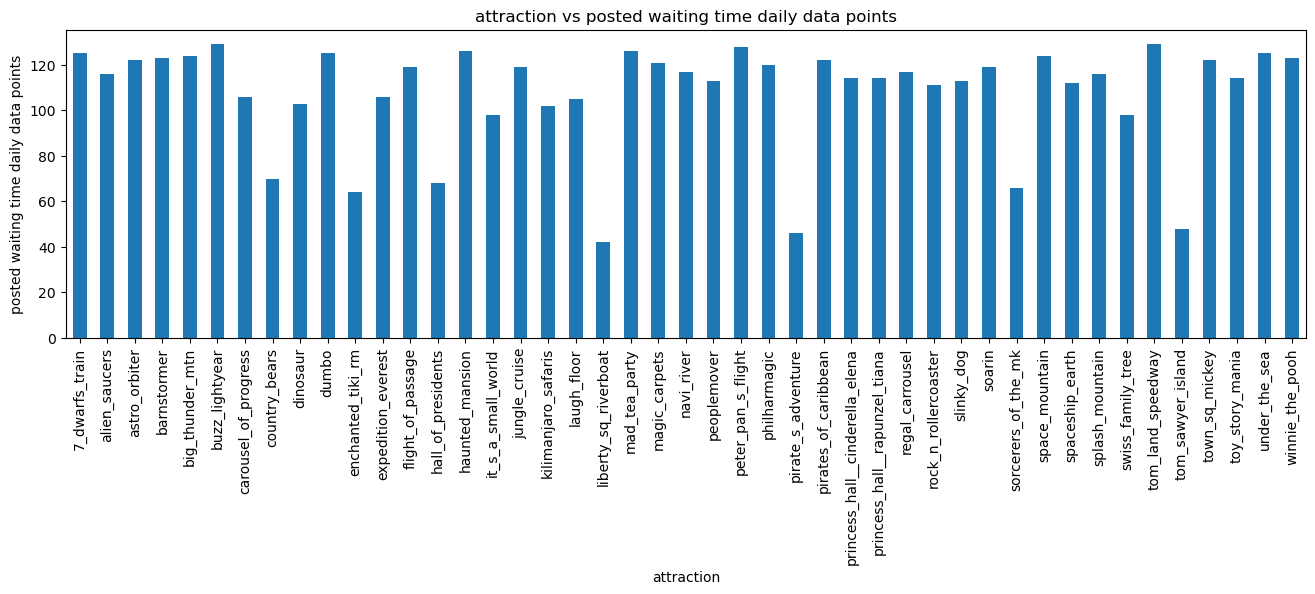

In [22]:
# Create the bar plot
plt.figure(figsize=(16, 4))
plt.bar(posted_waiting_time_grouped.index, posted_waiting_time_grouped.average_daily_SPOSTMIN_occurence_count, width=0.5)

# Rotate the x-axis labels vertically
plt.xticks(rotation='vertical')

# Set the limits of the x-axis to remove extra space
plt.xlim(-0.5, len(posted_waiting_time_grouped.index) - 0.5)

# Adding labels and title
plt.xlabel('attraction')
plt.ylabel('posted waiting time daily data points')
plt.title('attraction vs posted waiting time daily data points')

# Show the plot
plt.show()

a minimum of around 40 data points per day still seems acceptable to me

## Step 4: Study the distribution of data availability for actual waiting time information.

let's drop the posted waiting time since we'll focus on the actual waiting time only

In [23]:
actual_waiting_time = waiting_times_df.drop(columns=['SPOSTMIN'])

let's delete all NaN and -999 values from the dataframe

In [24]:
actual_waiting_time.dropna(subset=['SACTMIN'], inplace=True)
actual_waiting_time = actual_waiting_time[actual_waiting_time.SACTMIN >= 0]

let's drop the attraction column as well since we want to know the total number of datapoints across Disney World

In [25]:
actual_waiting_time_wo_attr = actual_waiting_time.drop(columns=['attraction'], inplace=False)

group the df per day

In [26]:
actual_waiting_time_dps_per_day = actual_waiting_time_wo_attr.groupby(pd.Grouper(key='datetime', freq='1D')).count()
actual_waiting_time_dps_per_day.rename(columns={'SACTMIN': 'data_points'}, inplace=True)
actual_waiting_time_dps_per_day.sort_values('data_points', inplace=False, ascending=False)

,data_points
datetime,
2021-10-10,380
2021-10-14,346
2021-09-25,330
2021-03-14,330
2021-03-18,329
...,...
2020-08-15,0
2020-08-14,0
2020-08-13,0


it would be more representative to know the number of datapoint per day **per attraction**

In [27]:
number_of_attractions = waiting_times_df.attraction.nunique()
actual_waiting_time_dps_per_day['data_points'] = (actual_waiting_time_dps_per_day['data_points'] / number_of_attractions).round().astype(int)
actual_waiting_time_dps_per_day.sort_values('data_points', inplace=False, ascending=False)

,data_points
datetime,
2021-10-14,8
2021-10-10,8
2021-09-26,7
2021-10-13,7
2021-10-11,7
...,...
2020-08-06,0
2020-08-05,0
2020-08-04,0


plot above date in a histogram

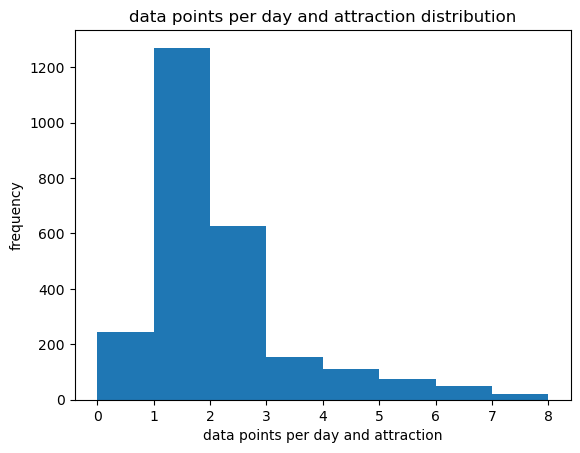

In [28]:
# Plotting the histogram
plt.hist(actual_waiting_time_dps_per_day, bins=8)

# Adding labels and title
plt.xlabel('data points per day and attraction')
plt.ylabel('frequency')
plt.title('data points per day and attraction distribution')

# Display the plot
plt.show()

in above histogram you can see that in general, there's not many data points per day and attraction

but maybe it could be interesting to see whether for some attraction on certain days we do have decent amounts of data points

In [29]:
actual_waiting_time_dps_per_day_and_attr = actual_waiting_time.groupby(['attraction', pd.Grouper(key='datetime', freq='1D')]).count()
actual_waiting_time_dps_per_day_and_attr.rename(columns={'SACTMIN': 'data_points'}, inplace=True)
actual_waiting_time_dps_per_day_and_attr.sort_values('data_points', inplace=True, ascending=False)
actual_waiting_time_dps_per_day_and_attr.head(10)

data_points
attraction           datetime               
big_thunder_mtn      2021-04-04           34
                     2021-03-19           34
pirates_of_caribbean 2021-08-01           33
big_thunder_mtn      2021-10-01           30
toy_story_mania      2021-05-14           30
big_thunder_mtn      2021-03-13           29
expedition_everest   2021-06-09           28
                     2021-10-10           28
pirates_of_caribbean 2021-10-10           28
expedition_everest   2021-04-07           27

# Research Question 1: Compare predicted and actual waiting time

In [30]:
waiting_times_df.head(10)

,datetime,SACTMIN,SPOSTMIN,attraction
0,2015-01-01 07:51:12,NaN,45.0,7_dwarfs_train
1,2015-01-01 08:02:13,NaN,60.0,7_dwarfs_train
2,2015-01-01 08:05:30,54.0,NaN,7_dwarfs_train
3,2015-01-01 08:09:12,NaN,60.0,7_dwarfs_train
4,2015-01-01 08:16:12,NaN,60.0,7_dwarfs_train
5,2015-01-01 08:22:16,55.0,NaN,7_dwarfs_train
6,2015-01-01 08:23:12,NaN,60.0,7_dwarfs_train
7,2015-01-01 08:29:12,NaN,60.0,7_dwarfs_train
8,2015-01-01 08:37:13,NaN,90.0,7_dwarfs_train
9,2015-01-01 08:44:11,NaN,105.0,7_dwarfs_train


create a mask for the non NaN SACTMIN values

In [31]:
act_mask = pd.notna(waiting_times_df.SACTMIN)

from the act_mask we can see that sometimes we have two non NaN SACTMIN values next to each other
<br>
=> let's delete these because we need one clear actual value in order to do proper analysis

In [32]:
# Shift the act_mask by one position forward and backward
shifted_forward = act_mask.shift(periods=1, fill_value=False)
shifted_backward = act_mask.shift(periods=-1, fill_value=False)

# Check if a line is True and the line before or after is also True
condition = (act_mask) & (shifted_forward | shifted_backward)

# Modify the True values to False based on the condition
act_mask = act_mask.mask(condition, False)

now create masks for before and after the non NaN SACTMIN values

In [33]:
before_mask = act_mask.shift(periods=-1).fillna(False)
after_mask = act_mask.shift(periods=1).fillna(False)

create the before, act and after dataframes with just the necessary information

In [34]:
#df_before = waiting_times_df[before_mask].reset_index(drop=True).drop(columns=['SACTMIN'])
#df_act = waiting_times_df[act_mask].reset_index(drop=True).drop(columns=['SPOSTMIN'])
#df_after = waiting_times_df[after_mask].reset_index(drop=True).drop(columns=['SACTMIN'])

In [35]:
df_before = waiting_times_df[before_mask].reset_index(drop=False).drop(columns=['SACTMIN'])
df_act = waiting_times_df[act_mask].reset_index(drop=False).drop(columns=['SPOSTMIN'])
df_after = waiting_times_df[after_mask].reset_index(drop=False).drop(columns=['SACTMIN'])

give the columns a prefix

In [36]:
df_before.rename(columns=lambda x: 'before_' + x, inplace=True)
df_act.rename(columns=lambda x: 'act_' + x, inplace=True)
df_after.rename(columns=lambda x: 'after_' + x, inplace=True)

concatenate the three dataframes from above in one big dataframe

In [37]:
actual_and_closest_posted_waiting_times= pd.concat([df_before, df_act, df_after], axis=1)
print(len(actual_and_closest_posted_waiting_times))
actual_and_closest_posted_waiting_times.head()

172673


,before_index,before_datetime,before_SPOSTMIN,before_attraction,act_index,act_datetime,act_SACTMIN,act_attraction,after_index,after_datetime,after_SPOSTMIN,after_attraction
0,1,2015-01-01 08:02:13,60.0,7_dwarfs_train,2,2015-01-01 08:05:30,54.0,7_dwarfs_train,3,2015-01-01 08:09:12,60.0,7_dwarfs_train
1,4,2015-01-01 08:16:12,60.0,7_dwarfs_train,5,2015-01-01 08:22:16,55.0,7_dwarfs_train,6,2015-01-01 08:23:12,60.0,7_dwarfs_train
2,176,2015-01-02 12:16:14,120.0,7_dwarfs_train,177,2015-01-02 12:20:00,160.0,7_dwarfs_train,178,2015-01-02 12:23:11,120.0,7_dwarfs_train
3,263,2015-01-02 21:44:13,70.0,7_dwarfs_train,264,2015-01-02 21:49:47,65.0,7_dwarfs_train,265,2015-01-02 21:51:12,60.0,7_dwarfs_train
4,280,2015-01-03 00:37:30,30.0,7_dwarfs_train,281,2015-01-03 00:44:09,19.0,7_dwarfs_train,282,2015-01-03 00:48:47,60.0,7_dwarfs_train


we don't need the before and after index so let's drop them

In [38]:
actual_and_closest_posted_waiting_times.drop(columns=['before_index', 'after_index'], inplace=True, errors='ignore')
actual_and_closest_posted_waiting_times.head()

,before_datetime,before_SPOSTMIN,before_attraction,act_index,act_datetime,act_SACTMIN,act_attraction,after_datetime,after_SPOSTMIN,after_attraction
0,2015-01-01 08:02:13,60.0,7_dwarfs_train,2,2015-01-01 08:05:30,54.0,7_dwarfs_train,2015-01-01 08:09:12,60.0,7_dwarfs_train
1,2015-01-01 08:16:12,60.0,7_dwarfs_train,5,2015-01-01 08:22:16,55.0,7_dwarfs_train,2015-01-01 08:23:12,60.0,7_dwarfs_train
2,2015-01-02 12:16:14,120.0,7_dwarfs_train,177,2015-01-02 12:20:00,160.0,7_dwarfs_train,2015-01-02 12:23:11,120.0,7_dwarfs_train
3,2015-01-02 21:44:13,70.0,7_dwarfs_train,264,2015-01-02 21:49:47,65.0,7_dwarfs_train,2015-01-02 21:51:12,60.0,7_dwarfs_train
4,2015-01-03 00:37:30,30.0,7_dwarfs_train,281,2015-01-03 00:44:09,19.0,7_dwarfs_train,2015-01-03 00:48:47,60.0,7_dwarfs_train


before, actual and after datapoint must all be from the same attraction

In [39]:
actual_and_closest_posted_waiting_times = actual_and_closest_posted_waiting_times[((actual_and_closest_posted_waiting_times.act_attraction == actual_and_closest_posted_waiting_times.before_attraction) & 
                                                                                    (actual_and_closest_posted_waiting_times.act_attraction == actual_and_closest_posted_waiting_times.after_attraction))]
len(actual_and_closest_posted_waiting_times)

172670

now that we are sure all lines have the same attraction, we can delete two columns

In [40]:
actual_and_closest_posted_waiting_times = (actual_and_closest_posted_waiting_times.drop(columns=['before_attraction', 'act_attraction'])
                                                                                    .rename(columns={'after_attraction': 'attraction'}))
actual_and_closest_posted_waiting_times.head()

,before_datetime,before_SPOSTMIN,act_index,act_datetime,act_SACTMIN,after_datetime,after_SPOSTMIN,attraction
0,2015-01-01 08:02:13,60.0,2,2015-01-01 08:05:30,54.0,2015-01-01 08:09:12,60.0,7_dwarfs_train
1,2015-01-01 08:16:12,60.0,5,2015-01-01 08:22:16,55.0,2015-01-01 08:23:12,60.0,7_dwarfs_train
2,2015-01-02 12:16:14,120.0,177,2015-01-02 12:20:00,160.0,2015-01-02 12:23:11,120.0,7_dwarfs_train
3,2015-01-02 21:44:13,70.0,264,2015-01-02 21:49:47,65.0,2015-01-02 21:51:12,60.0,7_dwarfs_train
4,2015-01-03 00:37:30,30.0,281,2015-01-03 00:44:09,19.0,2015-01-03 00:48:47,60.0,7_dwarfs_train


actual times where the before and after datapoints are more than 2 hours apart from each other, are considered faulty/unreliable

In [41]:
timedelta = pd.Timedelta(hours=2)
actual_and_closest_posted_waiting_times = actual_and_closest_posted_waiting_times[(actual_and_closest_posted_waiting_times.after_datetime - actual_and_closest_posted_waiting_times.before_datetime) < timedelta]

len(actual_and_closest_posted_waiting_times)

169195

Use linear interpolation to find the best estimate of posted waiting time for the actual waiting time we
are investigating

In [42]:
# Perform calculations and set values using .loc to avoid SettingWithCopyWarning
actual_and_closest_posted_waiting_times.loc[:, 'SPOSTMIN'] = (
    (actual_and_closest_posted_waiting_times['after_SPOSTMIN'] - actual_and_closest_posted_waiting_times['before_SPOSTMIN']) * 
    ((actual_and_closest_posted_waiting_times['act_datetime'] - actual_and_closest_posted_waiting_times['before_datetime']) / 
     (actual_and_closest_posted_waiting_times['after_datetime'] - actual_and_closest_posted_waiting_times['before_datetime'])) + 
     actual_and_closest_posted_waiting_times['before_SPOSTMIN']
)

# Display the DataFrame
actual_and_closest_posted_waiting_times.head()

,before_datetime,before_SPOSTMIN,act_index,act_datetime,act_SACTMIN,after_datetime,after_SPOSTMIN,attraction,SPOSTMIN
0,2015-01-01 08:02:13,60.0,2,2015-01-01 08:05:30,54.0,2015-01-01 08:09:12,60.0,7_dwarfs_train,60.000000
1,2015-01-01 08:16:12,60.0,5,2015-01-01 08:22:16,55.0,2015-01-01 08:23:12,60.0,7_dwarfs_train,60.000000
2,2015-01-02 12:16:14,120.0,177,2015-01-02 12:20:00,160.0,2015-01-02 12:23:11,120.0,7_dwarfs_train,120.000000
3,2015-01-02 21:44:13,70.0,264,2015-01-02 21:49:47,65.0,2015-01-02 21:51:12,60.0,7_dwarfs_train,62.028640
4,2015-01-03 00:37:30,30.0,281,2015-01-03 00:44:09,19.0,2015-01-03 00:48:47,60.0,7_dwarfs_train,47.680945


In [43]:
actual_and_closest_posted_waiting_times.rename(columns={'act_datetime': 'datetime', 'act_SACTMIN': 'SACTMIN', 'act_index': 'waiting_times_df_index'}, inplace=True)
actual_and_closest_posted_waiting_times = actual_and_closest_posted_waiting_times[['waiting_times_df_index', 'attraction', 'datetime', 'SPOSTMIN', 'SACTMIN']]
actual_and_closest_posted_waiting_times.head()

,waiting_times_df_index,attraction,datetime,SPOSTMIN,SACTMIN
0,2,7_dwarfs_train,2015-01-01 08:05:30,60.000000,54.0
1,5,7_dwarfs_train,2015-01-01 08:22:16,60.000000,55.0
2,177,7_dwarfs_train,2015-01-02 12:20:00,120.000000,160.0
3,264,7_dwarfs_train,2015-01-02 21:49:47,62.028640,65.0
4,281,7_dwarfs_train,2015-01-03 00:44:09,47.680945,19.0


Compute the difference between the actual and posted waiting time

In [44]:
actual_and_closest_posted_waiting_times['difference'] = actual_and_closest_posted_waiting_times['SPOSTMIN'] - actual_and_closest_posted_waiting_times['SACTMIN']
actual_and_closest_posted_waiting_times.head()

,waiting_times_df_index,attraction,datetime,SPOSTMIN,SACTMIN,difference
0,2,7_dwarfs_train,2015-01-01 08:05:30,60.000000,54.0,6.000000
1,5,7_dwarfs_train,2015-01-01 08:22:16,60.000000,55.0,5.000000
2,177,7_dwarfs_train,2015-01-02 12:20:00,120.000000,160.0,-40.000000
3,264,7_dwarfs_train,2015-01-02 21:49:47,62.028640,65.0,-2.971360
4,281,7_dwarfs_train,2015-01-03 00:44:09,47.680945,19.0,28.680945


flatten out the outliers

In [45]:
actual_and_closest_posted_waiting_times = remove_outliers(actual_and_closest_posted_waiting_times, 'difference', lower_multiplier=3, upper_multiplier=4.5)

Create a histogram of all these differences

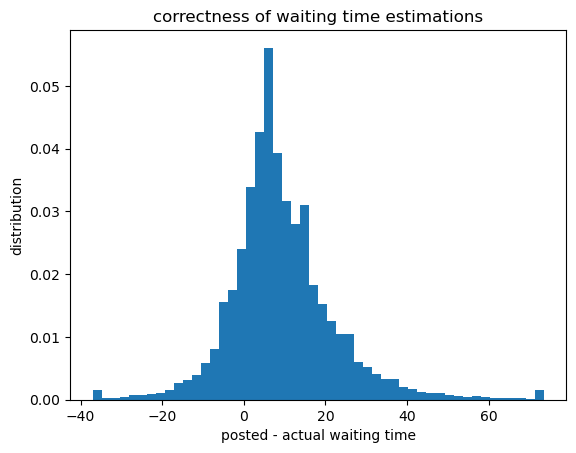

In [46]:
plt.hist(actual_and_closest_posted_waiting_times['cleaned_difference'], density=True, bins=50)

plt.xlabel('posted - actual waiting time')
plt.ylabel('distribution')
plt.title('correctness of waiting time estimations')

plt.show()

the histogram shows a normal distribution when it comes to the estimated (posted) waiting times vs the actual waiting times. From the histogram it can also be seen that there is tendency towards over estimating the waiting times rather than under estimating them

let's have another look at the result from the analysis we did before on the number of actual waiting time data points

In [47]:
actual_waiting_time_dps_per_day_and_attr.head(10)

data_points
attraction           datetime               
big_thunder_mtn      2021-04-04           34
                     2021-03-19           34
pirates_of_caribbean 2021-08-01           33
big_thunder_mtn      2021-10-01           30
toy_story_mania      2021-05-14           30
big_thunder_mtn      2021-03-13           29
expedition_everest   2021-06-09           28
                     2021-10-10           28
pirates_of_caribbean 2021-10-10           28
expedition_everest   2021-04-07           27

we can plot the actual and posted waiting time together in a single plot for some of the data sets with most points

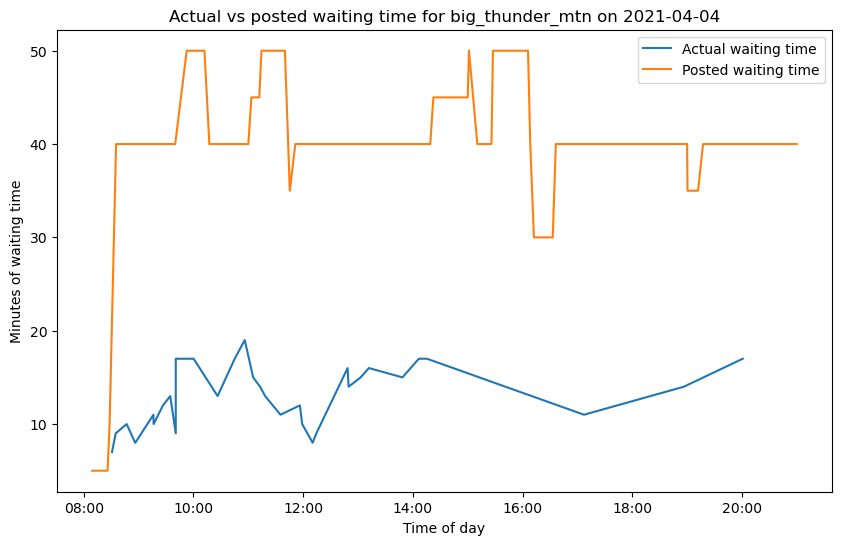

In [48]:
attraction_name = 'big_thunder_mtn'
date = '2021-04-04'
start_time = pd.to_datetime(date + ' 06:00:00')
end_time = pd.to_datetime(date + ' 23:59:59')

plot_waiting_times(attraction_name, date, start_time, end_time, waiting_times_df)

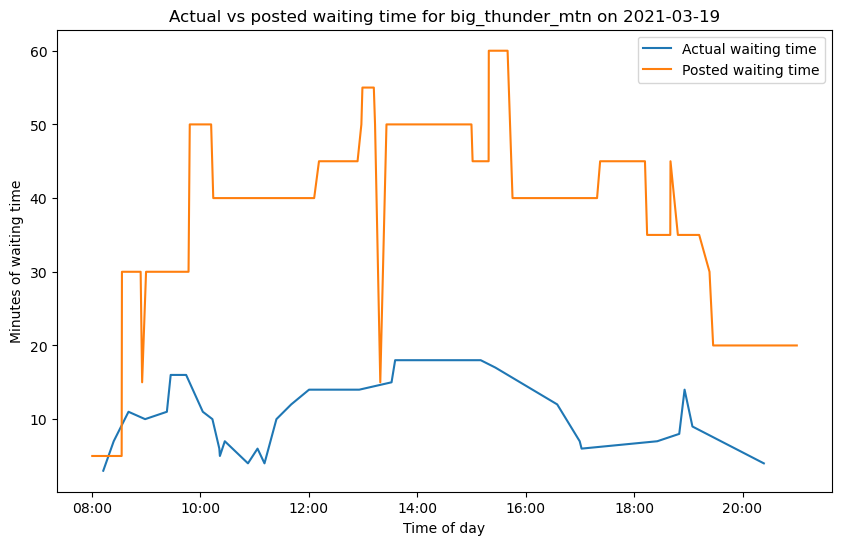

In [49]:
attraction_name = 'big_thunder_mtn'
date = '2021-03-19'
start_time = pd.to_datetime(date + ' 06:00:00')
end_time = pd.to_datetime(date + ' 23:59:59')

plot_waiting_times(attraction_name, date, start_time, end_time, waiting_times_df)

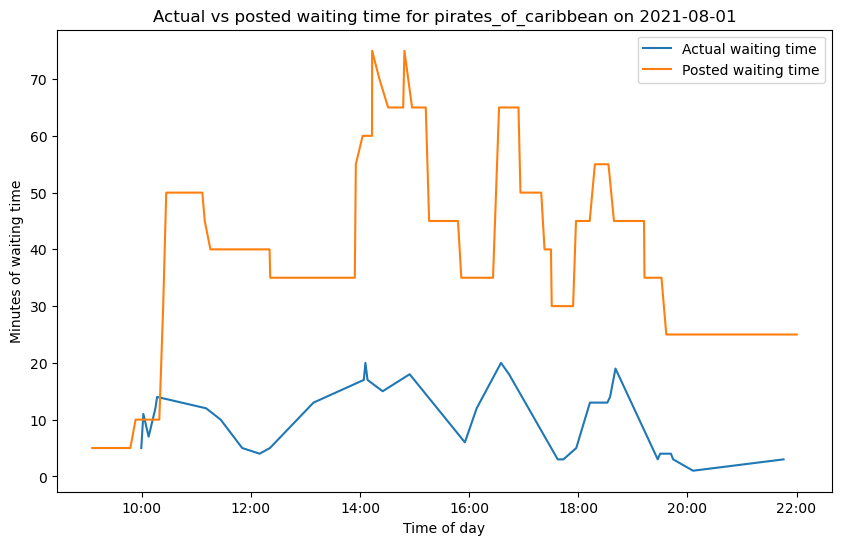

In [50]:
attraction_name = 'pirates_of_caribbean'
date = '2021-08-01'
start_time = pd.to_datetime(date + ' 06:00:00')
end_time = pd.to_datetime(date + ' 23:59:59')

plot_waiting_times(attraction_name, date, start_time, end_time, waiting_times_df)

above plots seem to confirm that the posted waiting times are usually an over estimation compared to the actual waiting times. Also you can notice that the spikes and dips in both curves follow more or less the same patterns

# Research Question 2: best day for rides

In [51]:
entities_file = os.path.join(parent_dir, 'data\\input\\overview data\\entities_extra.csv')

entities = pd.read_csv(entities_file, sep=',')
entities.head()

,name,fastpass_booth,created_at,updated_at,short_name,open_emh_morning,open_emh_evening,single_rider,time_zone,seasonal,...,masthead_circle_y,latitude,longitude,open_early,themeparks_id,has_virtual_queue,relative_open_base,virtual_queue_only,fastpass_average_minutes_saved,fastpass_average_gone_at
0,Astro Orbiter,False,2009-07-13T19:14:03.000-04:00,2021-11-15T12:59:25.000-05:00,Astro Orbiter,True,True,False,Eastern Time (US & Canada),False,...,31,28.418493,-81.578989,False,d9d12438-d999-4482-894b-8955fdb20ccf,False,0,False,0,0
1,The Barnstormer,False,2009-07-13T19:14:05.000-04:00,2023-01-15T22:03:41.000-05:00,Barnstormer,True,True,False,Eastern Time (US & Canada),False,...,157,28.420766,-81.578391,False,924a3b2c-6b4b-49e5-99d3-e9dc3f2e8a48,False,0,False,3,2000-01-01T21:00:00.000Z
2,Bibbidi Bobbidi Boutique,False,2019-11-27T06:45:19.000-05:00,2020-08-18T12:14:30.000-04:00,Bibbidi Bobbidi Boutique,False,False,False,Eastern Time (US & Canada),False,...,0,28.419479,-81.581235,False,0,False,0,False,0,0
3,Big Thunder Mountain Railroad,False,2009-07-13T16:14:03.000-07:00,2023-03-21T10:41:21.000-07:00,Big Thunder Mtn,False,True,False,Eastern Time (US & Canada),False,...,194,28.419964,-81.584642,False,de3309ca-97d5-4211-bffe-739fed47e92f,False,0,False,19,2000-01-01T18:00:00.000Z
4,Buzz Lightyear's Space Ranger Spin,False,2009-07-13T16:14:03.000-07:00,2023-03-21T09:15:14.000-07:00,Buzz Lightyear,True,True,False,Eastern Time (US & Canada),False,...,80,28.418287,-81.579409,False,72c7343a-f7fb-4f66-95df-c91016de7338,False,0,False,23,2000-01-01T21:00:00.000Z


only keep the name and category from above dataframe

In [52]:
entities = entities[['short_name', 'category_code']]
entities.head()

,short_name,category_code
0,Astro Orbiter,ride
1,Barnstormer,ride
2,Bibbidi Bobbidi Boutique,scheduled_exp
3,Big Thunder Mtn,ride
4,Buzz Lightyear,ride


replace capitals with lowercase and spaces with underscores for the name 

In [53]:
entities.short_name = entities.short_name.str.lower().str.replace(' ', '_')
entities.head()

,short_name,category_code
0,astro_orbiter,ride
1,barnstormer,ride
2,bibbidi_bobbidi_boutique,scheduled_exp
3,big_thunder_mtn,ride
4,buzz_lightyear,ride


merge posted_waiting_times and entities on attraction

In [54]:
posted_waiting_times_with_category = pd.merge(posted_waiting_time, 
                                       entities, 
                                       how='left', 
                                       left_on='attraction', 
                                       right_on='short_name').drop(columns='short_name')
posted_waiting_times_with_category.head()

,datetime,SPOSTMIN,attraction,category_code
0,2015-01-01 07:51:12,45.0,7_dwarfs_train,ride
1,2015-01-01 08:02:13,60.0,7_dwarfs_train,ride
2,2015-01-01 08:09:12,60.0,7_dwarfs_train,ride
3,2015-01-01 08:16:12,60.0,7_dwarfs_train,ride
4,2015-01-01 08:23:12,60.0,7_dwarfs_train,ride


some attractions were not found in the entities files so therefor we don't know whether or not they are rides. We will consider only the rides of which we are certain

In [55]:
posted_waiting_times_with_category[pd.isna(posted_waiting_times_with_category.category_code)].attraction.unique()

array(['alien_saucers', 'dinosaur', 'expedition_everest',
       'flight_of_passage', 'it_s_a_small_world', 'kilimanjaro_safaris',
       'navi_river', 'peter_pan_s_flight', 'pirate_s_adventure',
       'princess_hall__cinderella_elena', 'princess_hall__rapunzel_tiana',
       'rock_n_rollercoaster', 'slinky_dog', 'soarin',
       'sorcerers_of_the_mk', 'spaceship_earth', 'splash_mountain',
       'tom_land_speedway', 'toy_story_mania'], dtype=object)

filter out only the rides

In [56]:
posted_waiting_times_rides = posted_waiting_times_with_category[posted_waiting_times_with_category.category_code == 'ride'].drop(columns=['category_code'])
posted_waiting_times_rides.head()

,datetime,SPOSTMIN,attraction
0,2015-01-01 07:51:12,45.0,7_dwarfs_train
1,2015-01-01 08:02:13,60.0,7_dwarfs_train
2,2015-01-01 08:09:12,60.0,7_dwarfs_train
3,2015-01-01 08:16:12,60.0,7_dwarfs_train
4,2015-01-01 08:23:12,60.0,7_dwarfs_train


add another column to the df for the day of the week

In [57]:
posted_waiting_times_rides['day_of_week'] = posted_waiting_times_rides['datetime'].dt.day_name()
posted_waiting_times_rides.sample(10)

,datetime,SPOSTMIN,attraction,day_of_week
8369371,2018-05-23 15:27:06,25.0,under_the_sea,Wednesday
5725319,2015-01-19 12:05:05,0.0,regal_carrousel,Monday
5742525,2015-06-08 23:00:12,5.0,regal_carrousel,Monday
1092627,2017-11-24 14:14:08,50.0,big_thunder_mtn,Friday
1257480,2015-02-24 17:45:04,30.0,buzz_lightyear,Tuesday
1081025,2017-08-29 10:57:07,15.0,big_thunder_mtn,Tuesday
2677719,2017-09-12 14:07:07,30.0,haunted_mansion,Tuesday
2699177,2018-02-19 14:00:10,50.0,haunted_mansion,Monday
3336987,2021-11-03 10:07:31,30.0,jungle_cruise,Wednesday
243456,2021-01-04 11:19:02,75.0,7_dwarfs_train,Monday


calculate the average posted waiting time for each ride per day of the week

In [58]:
posted_waiting_times_rides_per_day_of_week = posted_waiting_times_rides.iloc[:, 1:].groupby(['attraction', 'day_of_week']).mean()
posted_waiting_times_rides_per_day_of_week

SPOSTMIN
attraction      day_of_week           
7_dwarfs_train  Friday       72.396490
                Monday       82.033452
                Saturday     84.142143
                Sunday       72.761413
                Thursday     73.354949
...                                ...
winnie_the_pooh Saturday     30.873446
                Sunday       26.324714
                Thursday     26.521647
                Tuesday      27.201617
                Wednesday    29.160712

[126 rows x 1 columns]

find the day with on average the least posted waiting time per ride

In [59]:
posted_waiting_times_rides_per_day_of_week = posted_waiting_times_rides_per_day_of_week.loc[
    posted_waiting_times_rides_per_day_of_week.groupby('attraction')['SPOSTMIN'].idxmin()
]

posted_waiting_times_rides_per_day_of_week = posted_waiting_times_rides_per_day_of_week.reset_index()[['attraction', 'day_of_week']]
posted_waiting_times_rides_per_day_of_week

,attraction,day_of_week
0,7_dwarfs_train,Friday
1,astro_orbiter,Friday
2,barnstormer,Friday
3,big_thunder_mtn,Sunday
4,buzz_lightyear,Friday
5,dumbo,Thursday
6,haunted_mansion,Thursday
7,jungle_cruise,Sunday
8,liberty_sq_riverboat,Thursday
9,mad_tea_party,Thursday


load the metadata file

In [60]:
metadata_file = os.path.join(parent_dir, 'data\\input\\overview data\\metadata.csv')

metadata = pd.read_csv(metadata_file, sep=',')
metadata.head()

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,01/01/2015,NaN,5,0,0,1,2015,CHRISTMAS PEAK,0,5,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,01/02/2015,NaN,6,1,0,1,2015,CHRISTMAS,2,5,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,01/03/2015,NaN,7,2,0,1,2015,CHRISTMAS,3,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,01/04/2015,NaN,1,3,1,1,2015,CHRISTMAS,4,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,01/05/2015,NaN,2,4,1,1,2015,CHRISTMAS,5,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


keep only the date, dayofweek and holidaysm columns

In [61]:
metadata = metadata[['DATE', 'DAYOFWEEK', 'HOLIDAYM']]
metadata.head()

,DATE,DAYOFWEEK,HOLIDAYM
0,01/01/2015,5,5
1,01/02/2015,6,5
2,01/03/2015,7,0
3,01/04/2015,1,0
4,01/05/2015,2,0


change the numbers in dayofweek into the actual names of the day of the week

In [62]:
day_mapping = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

metadata['DAYOFWEEK'] = metadata['DAYOFWEEK'].map(day_mapping)
metadata.head()

,DATE,DAYOFWEEK,HOLIDAYM
0,01/01/2015,Thursday,5
1,01/02/2015,Friday,5
2,01/03/2015,Saturday,0
3,01/04/2015,Sunday,0
4,01/05/2015,Monday,0


check what options there are for holidaym

In [63]:
metadata.HOLIDAYM.unique()

array([5, 0, 2, 4, 1, 3], dtype=int64)

turn the DATE from a string into a datetime object

In [64]:
metadata['DATE'] = pd.to_datetime(metadata['DATE'], format='%m/%d/%Y')

to delete:

In [65]:
metadata[(metadata.HOLIDAYM != 0) & (metadata.DATE.dt.year == 2015)]

,DATE,DAYOFWEEK,HOLIDAYM
0,2015-01-01,Thursday,5
1,2015-01-02,Friday,5
16,2015-01-17,Saturday,2
17,2015-01-18,Sunday,2
19,2015-01-20,Tuesday,2
20,2015-01-21,Wednesday,2
21,2015-01-22,Thursday,2
29,2015-01-30,Friday,2
30,2015-01-31,Saturday,2
32,2015-02-02,Monday,2


add a DATE column to posted_waiting_times_rides so we can link it afterwards and assign all datetimes from D from 5am until D+1 5am

In [69]:
posted_waiting_times_rides['DATE'] = pd.to_datetime(posted_waiting_times_rides['datetime'].apply(lambda dt: dt.date() - pd.Timedelta(days=1) if dt.hour < 5 else dt.date()))
posted_waiting_times_rides.head()

,datetime,SPOSTMIN,attraction,day_of_week,DATE
0,2015-01-01 07:51:12,45.0,7_dwarfs_train,Thursday,2015-01-01
1,2015-01-01 08:02:13,60.0,7_dwarfs_train,Thursday,2015-01-01
2,2015-01-01 08:09:12,60.0,7_dwarfs_train,Thursday,2015-01-01
3,2015-01-01 08:16:12,60.0,7_dwarfs_train,Thursday,2015-01-01
4,2015-01-01 08:23:12,60.0,7_dwarfs_train,Thursday,2015-01-01


merge posted_waiting_times_rides and metadate on DATE

In [85]:
posted_waiting_times_rides_with_holidaym = pd.merge(posted_waiting_times_rides, 
                                       metadata, 
                                       how='inner',
                                       on='DATE').drop(columns=['datetime', 'day_of_week', 'DATE'])
posted_waiting_times_rides_with_holidaym.head()

,SPOSTMIN,attraction,DAYOFWEEK,HOLIDAYM
0,45.0,7_dwarfs_train,Thursday,5
1,60.0,7_dwarfs_train,Thursday,5
2,60.0,7_dwarfs_train,Thursday,5
3,60.0,7_dwarfs_train,Thursday,5
4,60.0,7_dwarfs_train,Thursday,5


get the average of the posted waiting time per ride and per holidaym

In [102]:
posted_waiting_time_rides_grouped_by_attr_and_holidaym = (posted_waiting_times_rides_with_holidaym
                                                            .groupby(['attraction', 'DAYOFWEEK', 'HOLIDAYM']) # first take day of week into account as well 
                                                            .mean() # have the mean posted waiting time per attraction, day of the week and holidaym
                                                            .reset_index(level='DAYOFWEEK')
                                                            .groupby(['attraction', 'HOLIDAYM'])['SPOSTMIN']
                                                            .mean() # have the mean posted waiting time per attraction and holidaym disregarding the day of the week
                                                            .reset_index())
posted_waiting_time_rides_grouped_by_attr_and_holidaym

,attraction,HOLIDAYM,SPOSTMIN
0,7_dwarfs_train,0,77.402345
1,7_dwarfs_train,1,77.021411
2,7_dwarfs_train,2,80.354866
3,7_dwarfs_train,3,85.480176
4,7_dwarfs_train,4,91.093044
...,...,...,...
96,winnie_the_pooh,1,28.022193
97,winnie_the_pooh,2,29.070051
98,winnie_the_pooh,3,30.273973
99,winnie_the_pooh,4,31.041546


create a plot to visualize the effect of HOLIDAYM on the posted waiting times for each ride

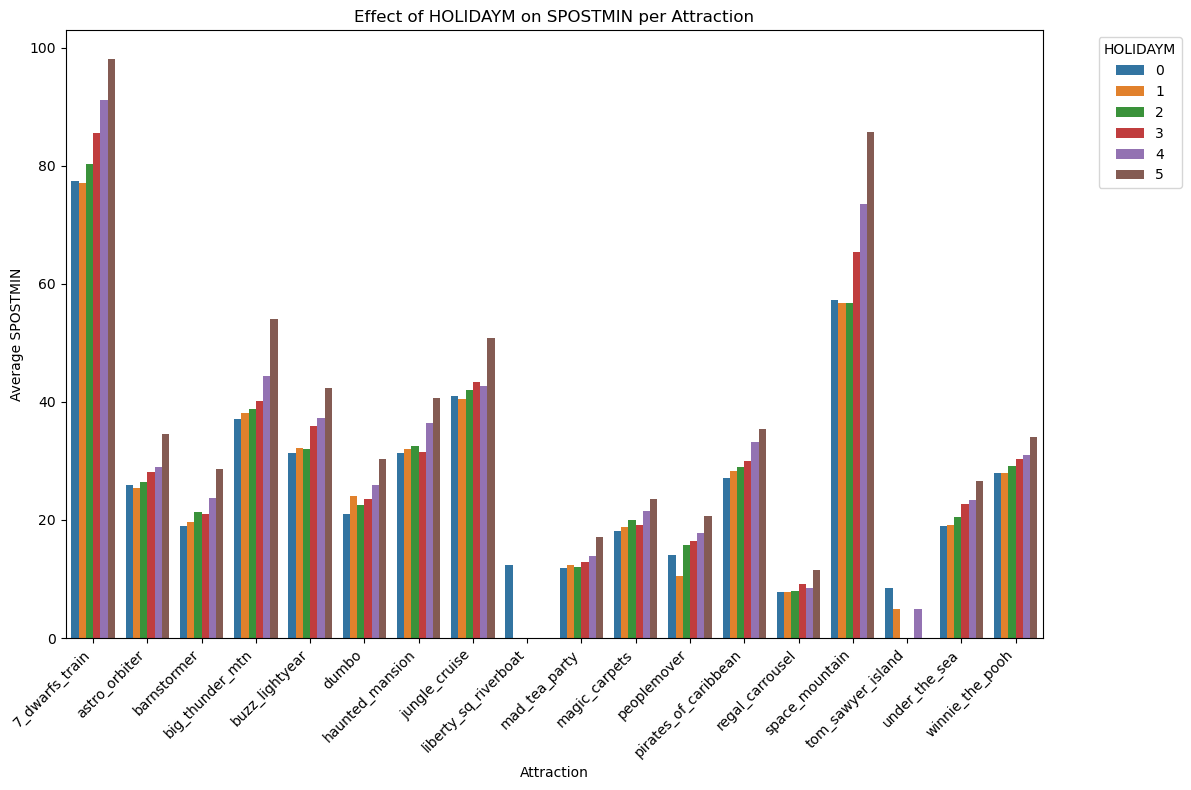

In [112]:
# Convert 'HOLIDAYM' to strings
posted_waiting_time_rides_grouped_by_attr_and_holidaym['HOLIDAYM'] = posted_waiting_time_rides_grouped_by_attr_and_holidaym['HOLIDAYM'].astype(str)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='attraction', y='SPOSTMIN', hue='HOLIDAYM', data=posted_waiting_time_rides_grouped_by_attr_and_holidaym, errorbar=None)
plt.title('Effect of HOLIDAYM on SPOSTMIN per Attraction')
plt.xlabel('Attraction')
plt.ylabel('Average SPOSTMIN')
plt.legend(title='HOLIDAYM', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

some attractions don't have any data points for certain categories of HOLIDAYM so let's delete these from the dataframe to have a cleaner plot

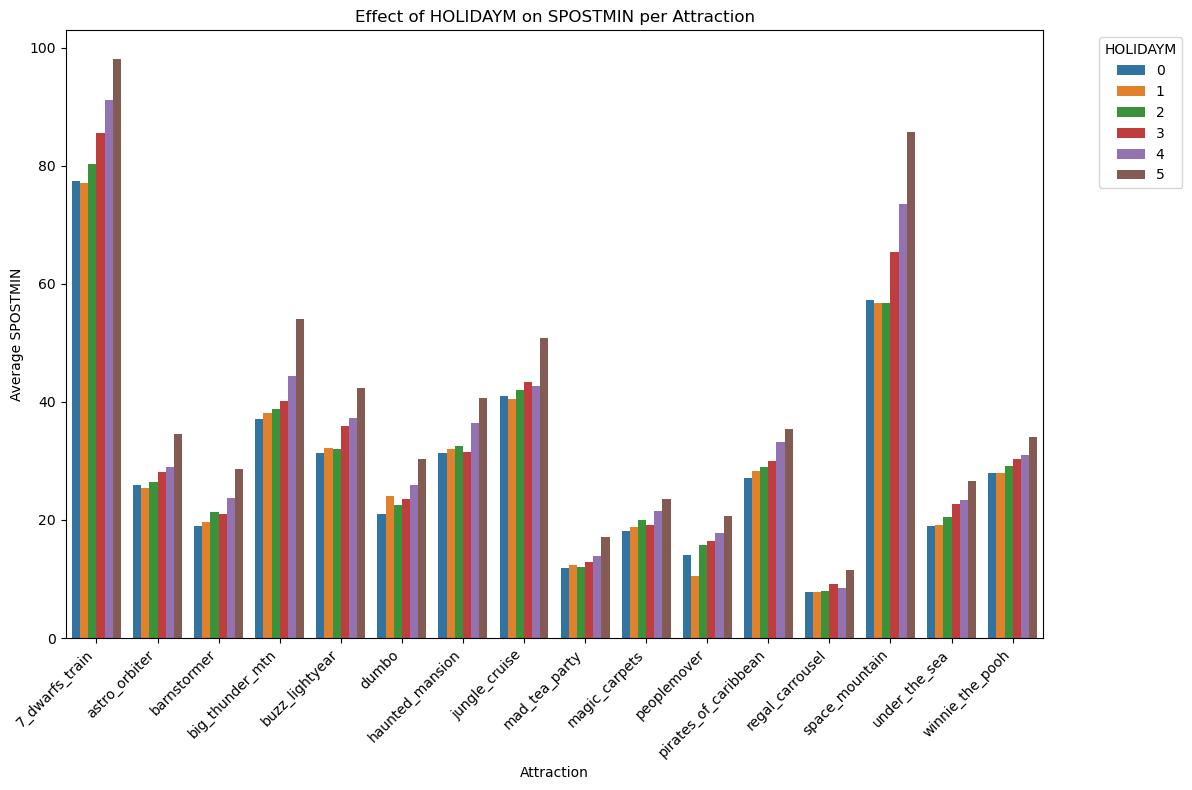

In [116]:
posted_waiting_time_rides_grouped_by_attr_and_holidaym_cleaned = \
    posted_waiting_time_rides_grouped_by_attr_and_holidaym[
        (~posted_waiting_time_rides_grouped_by_attr_and_holidaym.attraction.isin(['liberty_sq_riverboat', 'tom_sawyer_island']))
    ]


# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='attraction', y='SPOSTMIN', hue='HOLIDAYM', data=posted_waiting_time_rides_grouped_by_attr_and_holidaym_cleaned, errorbar=None)
plt.title('Effect of HOLIDAYM on SPOSTMIN per Attraction')
plt.xlabel('Attraction')
plt.ylabel('Average SPOSTMIN')
plt.legend(title='HOLIDAYM', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

the posted waiting times per attraction increases with an increase in HOLIDAYM. For this reason, I assume that HOLIDAYM is a holiday multiplier which disney world uses to estimate an increase in visitors for certain holidays. The higher HOLIDAYM, the more visitors they expect to have